# Comparisons 429904 m1(spout, no spout), and m3 (spout, no spout)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import cv2
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter
from scipy.signal import cheby1, filtfilt, find_peaks, peak_widths
import scipy
from tqdm import tqdm
%matplotlib inline
import plotly.express as px
import imagecodecs
from matplotlib.animation import FuncAnimation
import pickle

from preprocessing_functions import (load_frames, 
                                        interactive_plot, 
                                        plot_frame, 
                                        temporal_mean, 
                                        remove_dark_frames, 
                                        extract_artifacts, 
                                        interpolate, 
                                        dff, 
                                        smoothing, 
                                        save_tiff,
                                        load_txt,
                                        extract_txt_flashes,
                                        load_masks, 
                                        avg_trials,
                                        extract_v1,
                                        animate_figure
)

In [2]:
# loads in the whole notebook variables
#%run "429904_m1_stage2_day2_no_spouts.ipynb"
#%run "429904_m1_stage2_day2_with_spouts.ipynb"
#%run "429904_m3_stage2_day1_no_spouts.ipynb"
#%run "429904_m3_stage2_day1_with_spouts.ipynb"    

## m1 no spouts

In [3]:
#m1 no spouts
#v1 single
path_m1_no_spout_single_v1 = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_no_spouts_single_v1.pickle" 
with open(path_m1_no_spout_single_v1, 'rb') as f:
    m1_no_spout_single_v1 = pickle.load(f)

#v1 double
path_m1_no_spout_double_v1 ="X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_no_spouts_double_v1.pickle" 
with open(path_m1_no_spout_double_v1, 'rb') as f:
    m1_no_spout_double_v1 = pickle.load(f)

#full frame single
path_m1_no_spout_single_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_no_spouts_single_ff.pickle" 
with open(path_m1_no_spout_single_ff, 'rb') as f:
    m1_no_spout_single_ff = pickle.load(f)

#full frame double
path_m1_no_spout_double_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_no_spouts_double_ff.pickle" 
with open(path_m1_no_spout_double_ff, 'rb') as f:
    m1_no_spout_double_ff = pickle.load(f)

## m1 spouts

In [4]:
#m1 spouts
#v1 single
path_m1_spout_single_v1 = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_spouts_single_v1.pickle" 
with open(path_m1_spout_single_v1, 'rb') as f:
    m1_spout_single_v1 = pickle.load(f)

#v1 double
path_m1_spout_double_v1 ="X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_spouts_double_v1.pickle" 
with open(path_m1_spout_double_v1, 'rb') as f:
    m1_spout_double_v1 = pickle.load(f)

#full frame single
path_m1_spout_single_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_spouts_single_ff.pickle" 
with open(path_m1_spout_single_ff, 'rb') as f:
    m1_spout_single_ff = pickle.load(f)

#full frame double
path_m1_spout_double_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m1_stage2_day2_spouts_double_ff.pickle" 
with open(path_m1_spout_double_ff, 'rb') as f:
    m1_spout_double_ff = pickle.load(f)

## m3 no spouts

In [5]:
#m3 no spouts
#v1 single
path_m3_no_spout_single_v1 = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_no_spouts_single_v1.pickle" 
with open(path_m3_no_spout_single_v1, 'rb') as f:
    m3_no_spout_single_v1 = pickle.load(f)

#v1 double
path_m3_no_spout_double_v1 ="X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_no_spouts_double_v1.pickle" 
with open(path_m3_no_spout_double_v1, 'rb') as f:
    m3_no_spout_double_v1 = pickle.load(f)

#full frame single
path_m3_no_spout_single_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_no_spouts_single_ff.pickle" 
with open(path_m3_no_spout_single_ff, 'rb') as f:
    m3_no_spout_single_ff = pickle.load(f)

#full frame double
path_m3_no_spout_double_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_no_spouts_double_ff.pickle" 
with open(path_m1_no_spout_double_ff, 'rb') as f:
    m3_no_spout_double_ff = pickle.load(f)

## m3 spouts

In [6]:
#m3 spouts
#v1 single
path_m3_spout_single_v1 = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_spouts_single_v1.pickle" 
with open(path_m3_spout_single_v1, 'rb') as f:
    m3_spout_single_v1 = pickle.load(f)

#v1 double
path_m3_spout_double_v1 ="X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_spouts_double_v1.pickle" 
with open(path_m3_spout_double_v1, 'rb') as f:
    m3_spout_double_v1 = pickle.load(f)

#full frame single
path_m3_spout_single_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_spouts_single_ff.pickle" 
with open(path_m3_spout_single_ff, 'rb') as f:
    m3_spout_single_ff = pickle.load(f)

#full frame double
path_m3_spout_double_ff = "X:/Raymond Lab/Kaiiiii/processed_data/pickle/429904_m3_stage2_day1_spouts_double_ff.pickle" 
with open(path_m3_spout_double_ff, 'rb') as f:
    m3_spout_double_ff = pickle.load(f)

# figures

In [19]:
print(
    min(m1_no_spout_single_v1_mean),
    min(m1_no_spout_double_v1_mean),
    min(m1_spout_single_v1_mean),
    min(m1_spout_double_v1_mean),
    min(m3_no_spout_single_v1_mean),
    min(m3_no_spout_double_v1_mean),
    min(m3_spout_single_v1_mean),
    min(m3_spout_double_v1_mean))

-0.006984721 -0.0039947834 -0.004095635 -0.004578967 -0.0049972367 -0.00585634 -0.0025791533 -0.0058856993


In [21]:
print(
    max(m1_no_spout_single_v1_mean),
    max(m1_no_spout_double_v1_mean),
    max(m1_spout_single_v1_mean),
    max(m1_spout_double_v1_mean),
    max(m3_no_spout_single_v1_mean),
    max(m3_no_spout_double_v1_mean),
    max(m3_spout_single_v1_mean),
    max(m3_spout_double_v1_mean))

0.016526198 0.009858135 0.013907082 0.0082550645 0.011458885 0.0053977375 0.004946972 0.028020985


# v1 

In [ ]:
m1_no_spout_single_v1_mean = m1_no_spout_single_v1.mean(axis=(1,2))
m1_no_spout_double_v1_mean = m1_no_spout_double_v1.mean(axis=(1,2))
m1_spout_single_v1_mean = m1_spout_single_v1.mean(axis=(1,2))
m1_spout_double_v1_mean = m1_spout_double_v1.mean(axis=(1,2))
m3_no_spout_single_v1_mean = m3_no_spout_single_v1.mean(axis=(1,2))
m3_no_spout_double_v1_mean = m3_no_spout_double_v1.mean(axis=(1,2))
m3_spout_single_v1_mean = m3_spout_single_v1.mean(axis=(1,2))
m3_spout_double_v1_mean = m3_spout_double_v1.mean(axis=(1,2))

## WT or HD comparison

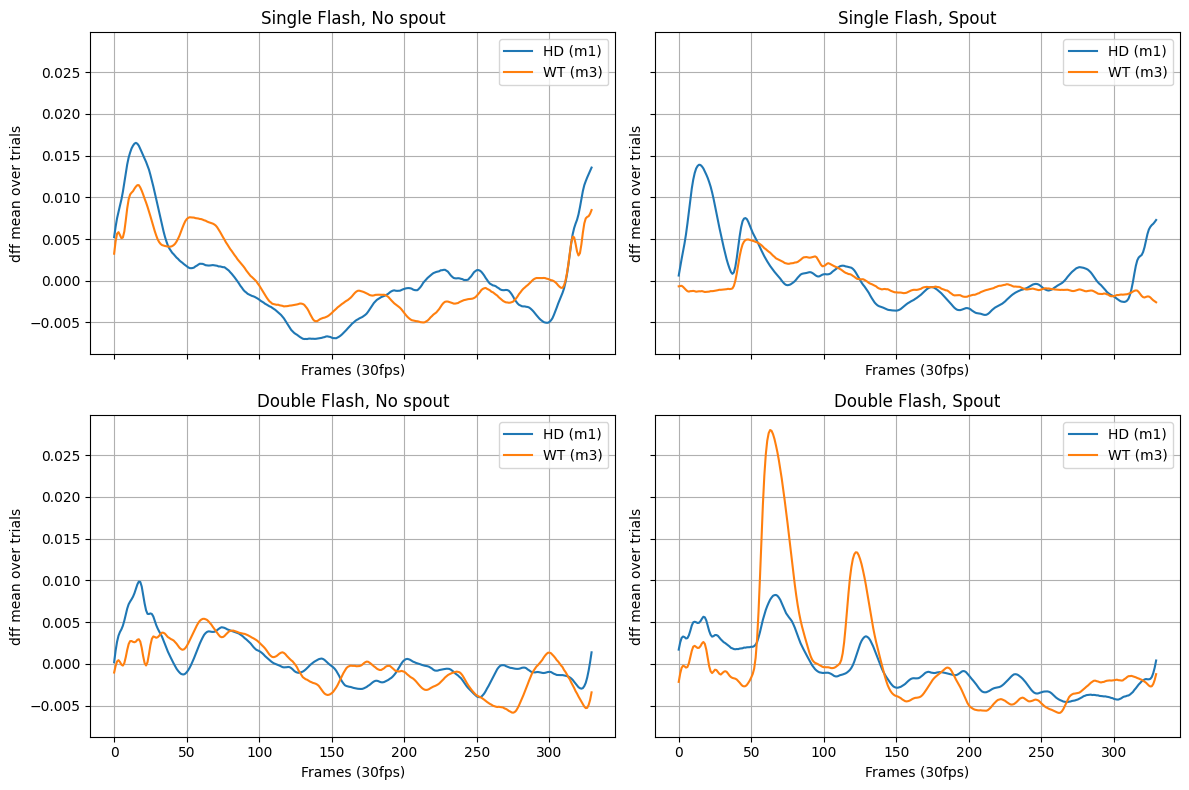

In [45]:
# WT or HD comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# WT or HD on columns and single or double flash on rows
for i, flash_type in enumerate(["single", "double"]):
    for j, spout_type in enumerate(["no_spout", "spout"]):
        if flash_type == "single":
            if spout_type == "no_spout":
                axs[i, j].plot(frames, m1_no_spout_single_v1_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_no_spout_single_v1_mean, label='WT (m3)')
            else:
                axs[i, j].plot(frames, m1_spout_single_v1_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_spout_single_v1_mean, label='WT (m3)')
        else:
            if spout_type == "no_spout":
                axs[i, j].plot(frames, m1_no_spout_double_v1_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_no_spout_double_v1_mean, label='WT (m3)')
            else:
                axs[i, j].plot(frames, m1_spout_double_v1_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_spout_double_v1_mean, label='WT (m3)')
        axs[i, j].set_title(f"{flash_type.capitalize()} Flash, {spout_type.replace('_', ' ').capitalize()}")
        axs[i, j].set_xlabel('Frames (30fps)')
        axs[i, j].set_ylabel('dff mean over trials')
        axs[i, j].legend()
        axs[i, j].grid(True)

plt.tight_layout()

plt.savefig('X:/Raymond Lab/Kaiiiii/processed_data/HD_or_WT_v1.png')

plt.show()

## spout or no spout

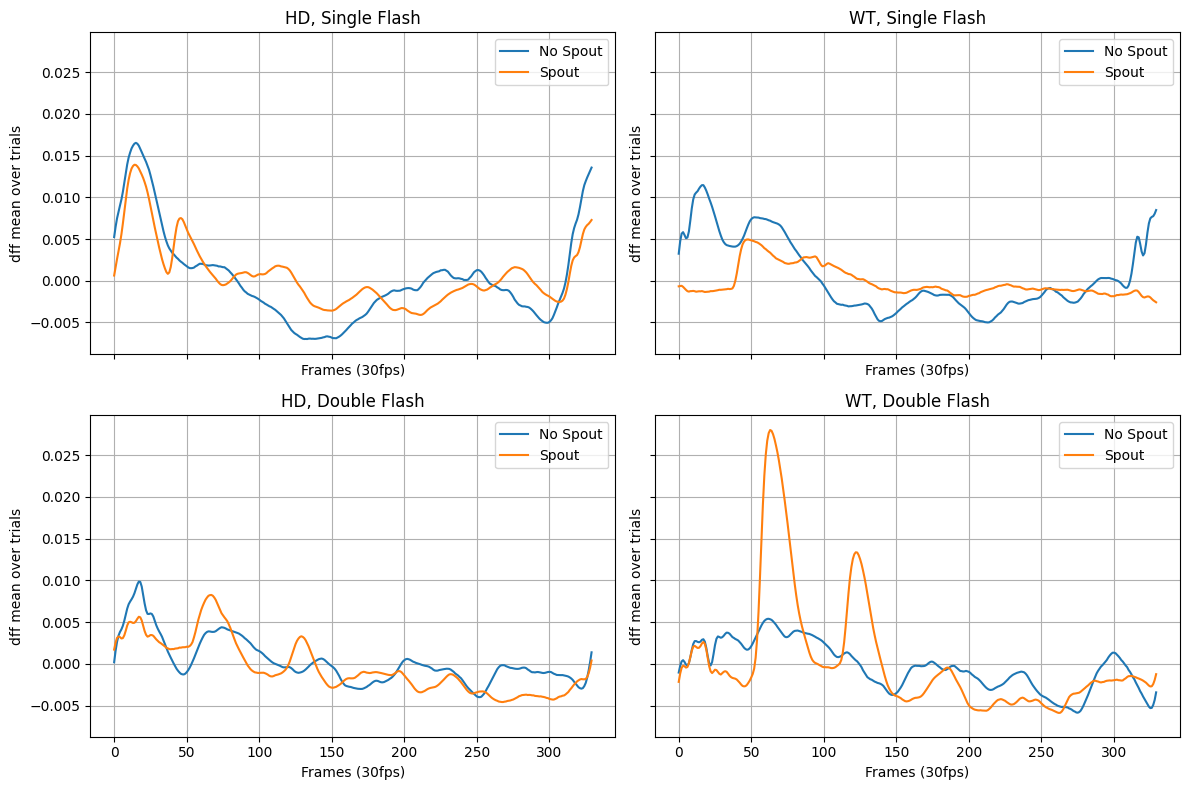

In [44]:
# spout or no spout
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# WT or HD on columns and single or double flash on rows
for i, flash_type in enumerate(["single", "double"]):
    for j, hd_or_wt in enumerate(["HD", "WT"]):
        if flash_type == "single":
            if hd_or_wt == "HD":
                axs[i, j].plot(frames, m1_no_spout_single_v1_mean, label='No Spout')
                axs[i, j].plot(frames, m1_spout_single_v1_mean, label='Spout')
            else:
                axs[i, j].plot(frames, m3_no_spout_single_v1_mean, label='No Spout')
                axs[i, j].plot(frames, m3_spout_single_v1_mean, label='Spout')
        else:
            if hd_or_wt == "HD":
                axs[i, j].plot(frames, m1_no_spout_double_v1_mean, label='No Spout')
                axs[i, j].plot(frames, m1_spout_double_v1_mean, label='Spout')
            else:
                axs[i, j].plot(frames, m3_no_spout_double_v1_mean, label='No Spout')
                axs[i, j].plot(frames, m3_spout_double_v1_mean, label='Spout')
        axs[i, j].set_title(f"{hd_or_wt}, {flash_type.capitalize()} Flash")
        axs[i, j].set_xlabel('Frames (30fps)')
        axs[i, j].set_ylabel('dff mean over trials')
        axs[i, j].legend()
        axs[i, j].grid(True)

plt.tight_layout()

plt.savefig('X:/Raymond Lab/Kaiiiii/processed_data/spout_or_nospout_v1.png')

plt.show()

## single or double

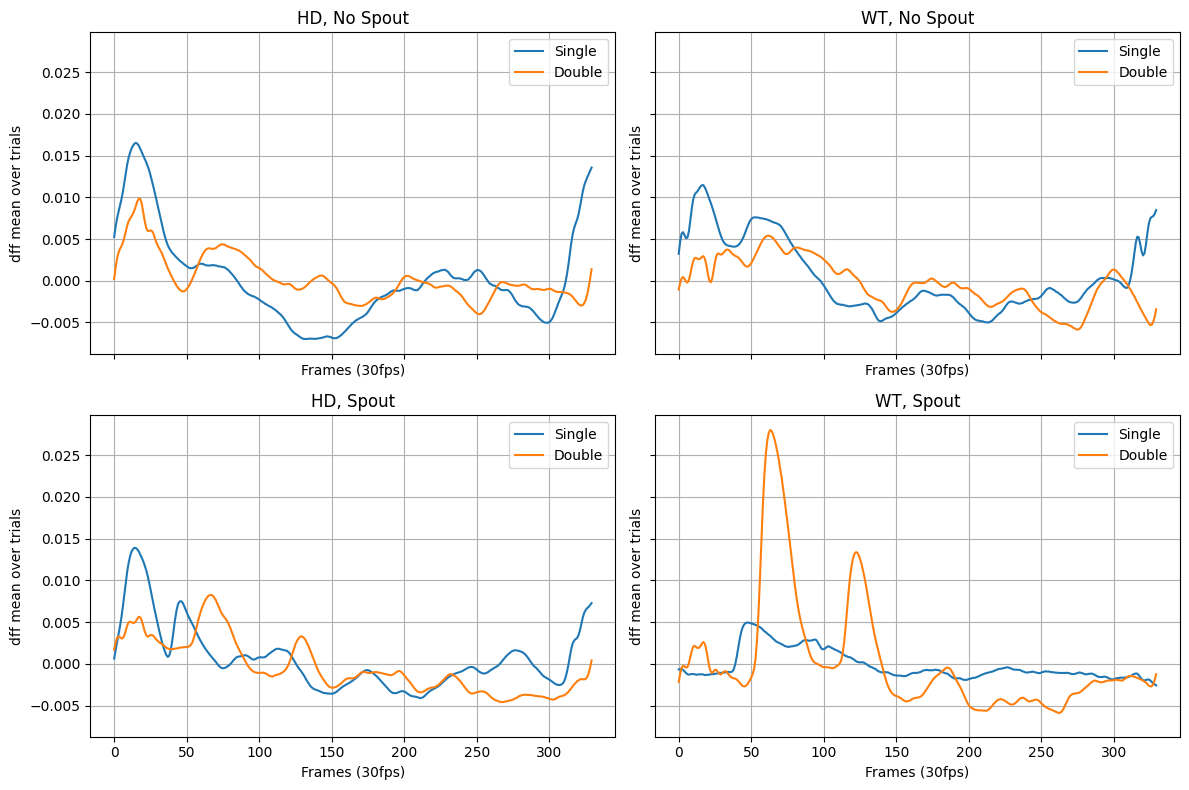

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Single or Double flash on lines and spout or no spout on rows
for i, hd_or_wt in enumerate(["HD", "WT"]):
    for j, spout_type in enumerate(["No Spout", "Spout"]):
        if hd_or_wt == "HD":
            if spout_type == "No Spout":
                axs[j, i].plot(frames, m1_no_spout_single_v1_mean, label='Single')
                axs[j, i].plot(frames, m1_no_spout_double_v1_mean, label='Double')
            else:
                axs[j, i].plot(frames, m1_spout_single_v1_mean, label='Single')
                axs[j, i].plot(frames, m1_spout_double_v1_mean, label='Double')
        else:
            if spout_type == "No Spout":
                axs[j, i].plot(frames, m3_no_spout_single_v1_mean, label='Single')
                axs[j, i].plot(frames, m3_no_spout_double_v1_mean, label='Double')
            else:
                axs[j, i].plot(frames, m3_spout_single_v1_mean, label='Single')
                axs[j, i].plot(frames, m3_spout_double_v1_mean, label='Double')
        axs[j, i].set_title(f"{hd_or_wt}, {spout_type}")
        axs[i, j].set_xlabel('Frames (30fps)')
        axs[i, j].set_ylabel('dff mean over trials')
        axs[j, i].legend()
        axs[j, i].grid(True)

plt.tight_layout()

plt.savefig('X:/Raymond Lab/Kaiiiii/processed_data/single_or_double_v1.png')

plt.show()

# full frame

In [49]:
m1_no_spout_single_ff_mean = m1_no_spout_single_ff.mean(axis=(1,2))
m1_no_spout_double_ff_mean = m1_no_spout_double_ff.mean(axis=(1,2))
m1_spout_single_ff_mean = m1_spout_single_ff.mean(axis=(1,2))
m1_spout_double_ff_mean = m1_spout_double_ff.mean(axis=(1,2))
m3_no_spout_single_ff_mean = m3_no_spout_single_ff.mean(axis=(1,2))
m3_no_spout_double_ff_mean = m3_no_spout_double_ff.mean(axis=(1,2))
m3_spout_single_ff_mean = m3_spout_single_ff.mean(axis=(1,2))
m3_spout_double_ff_mean = m3_spout_double_ff.mean(axis=(1,2))

## WT or HD

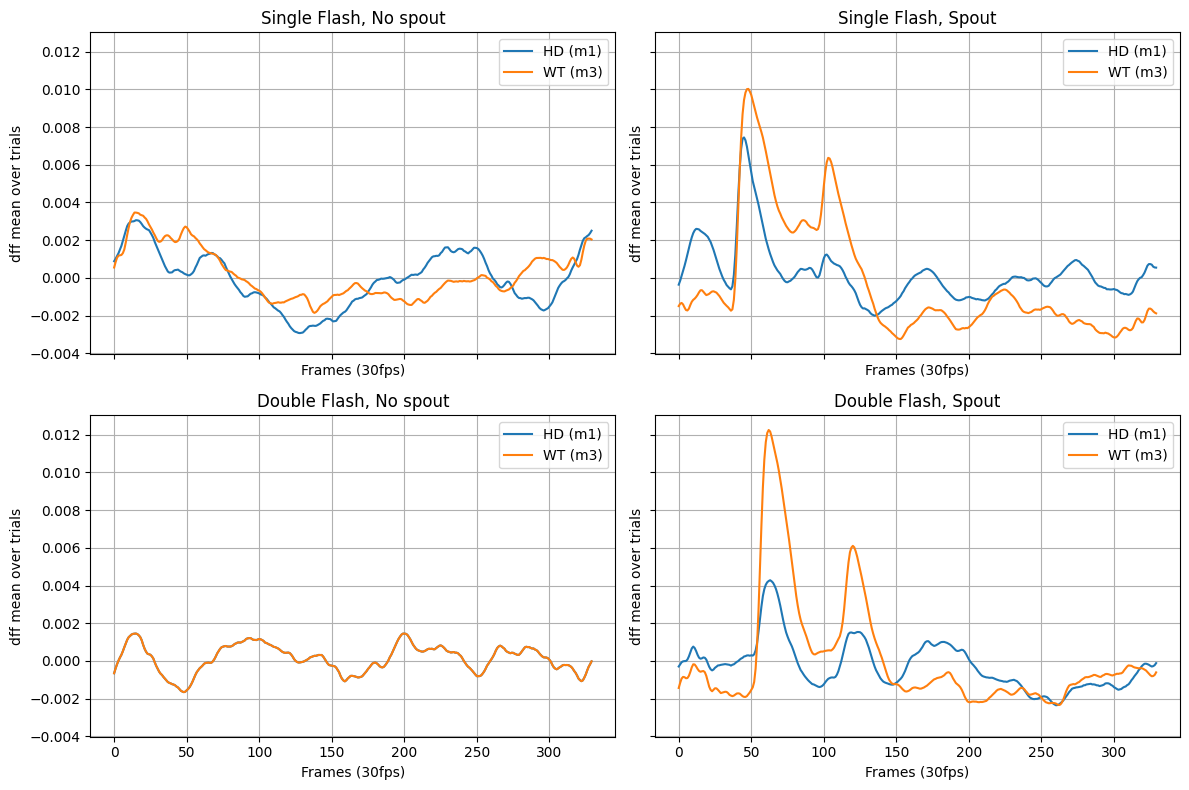

In [50]:
# WT or HD comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# WT or HD on columns and single or double flash on rows
for i, flash_type in enumerate(["single", "double"]):
    for j, spout_type in enumerate(["no_spout", "spout"]):
        if flash_type == "single":
            if spout_type == "no_spout":
                axs[i, j].plot(frames, m1_no_spout_single_ff_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_no_spout_single_ff_mean, label='WT (m3)')
            else:
                axs[i, j].plot(frames, m1_spout_single_ff_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_spout_single_ff_mean, label='WT (m3)')
        else:
            if spout_type == "no_spout":
                axs[i, j].plot(frames, m1_no_spout_double_ff_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_no_spout_double_ff_mean, label='WT (m3)')
            else:
                axs[i, j].plot(frames, m1_spout_double_ff_mean, label='HD (m1)')
                axs[i, j].plot(frames, m3_spout_double_ff_mean, label='WT (m3)')
        axs[i, j].set_title(f"{flash_type.capitalize()} Flash, {spout_type.replace('_', ' ').capitalize()}")
        axs[i, j].set_xlabel('Frames (30fps)')
        axs[i, j].set_ylabel('dff mean over trials')
        axs[i, j].legend()
        axs[i, j].grid(True)

plt.tight_layout()

plt.savefig('X:/Raymond Lab/Kaiiiii/processed_data/HD_or_WT_ff.png')

plt.show()

## spout or no spout

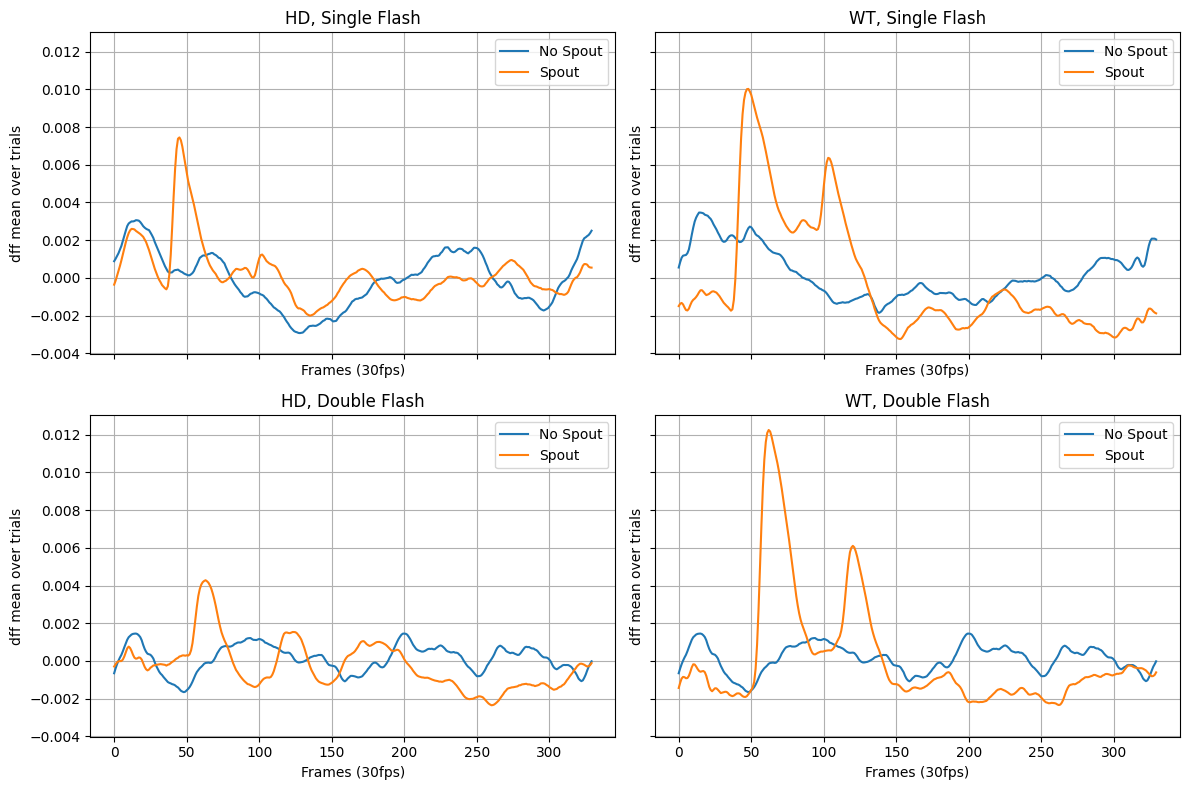

In [51]:
# spout or no spout
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# WT or HD on columns and single or double flash on rows
for i, flash_type in enumerate(["single", "double"]):
    for j, hd_or_wt in enumerate(["HD", "WT"]):
        if flash_type == "single":
            if hd_or_wt == "HD":
                axs[i, j].plot(frames, m1_no_spout_single_ff_mean, label='No Spout')
                axs[i, j].plot(frames, m1_spout_single_ff_mean, label='Spout')
            else:
                axs[i, j].plot(frames, m3_no_spout_single_ff_mean, label='No Spout')
                axs[i, j].plot(frames, m3_spout_single_ff_mean, label='Spout')
        else:
            if hd_or_wt == "HD":
                axs[i, j].plot(frames, m1_no_spout_double_ff_mean, label='No Spout')
                axs[i, j].plot(frames, m1_spout_double_ff_mean, label='Spout')
            else:
                axs[i, j].plot(frames, m3_no_spout_double_ff_mean, label='No Spout')
                axs[i, j].plot(frames, m3_spout_double_ff_mean, label='Spout')
        axs[i, j].set_title(f"{hd_or_wt}, {flash_type.capitalize()} Flash")
        axs[i, j].set_xlabel('Frames (30fps)')
        axs[i, j].set_ylabel('dff mean over trials')
        axs[i, j].legend()
        axs[i, j].grid(True)

plt.tight_layout()

plt.savefig('X:/Raymond Lab/Kaiiiii/processed_data/spout_or_nospout_ff.png')

plt.show()

## single or double

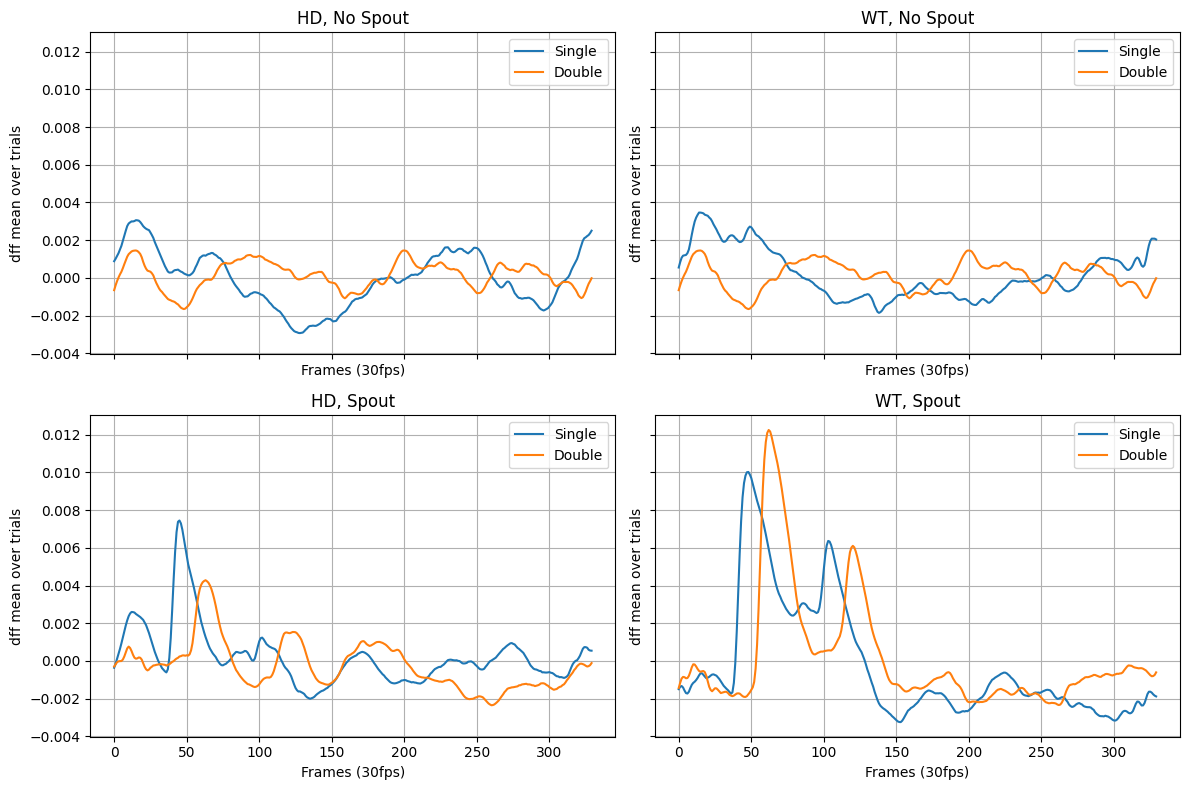

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Single or Double flash on lines and spout or no spout on rows
for i, hd_or_wt in enumerate(["HD", "WT"]):
    for j, spout_type in enumerate(["No Spout", "Spout"]):
        if hd_or_wt == "HD":
            if spout_type == "No Spout":
                axs[j, i].plot(frames, m1_no_spout_single_ff_mean, label='Single')
                axs[j, i].plot(frames, m1_no_spout_double_ff_mean, label='Double')
            else:
                axs[j, i].plot(frames, m1_spout_single_ff_mean, label='Single')
                axs[j, i].plot(frames, m1_spout_double_ff_mean, label='Double')
        else:
            if spout_type == "No Spout":
                axs[j, i].plot(frames, m3_no_spout_single_ff_mean, label='Single')
                axs[j, i].plot(frames, m3_no_spout_double_ff_mean, label='Double')
            else:
                axs[j, i].plot(frames, m3_spout_single_ff_mean, label='Single')
                axs[j, i].plot(frames, m3_spout_double_ff_mean, label='Double')
        axs[j, i].set_title(f"{hd_or_wt}, {spout_type}")
        axs[i, j].set_xlabel('Frames (30fps)')
        axs[i, j].set_ylabel('dff mean over trials')
        axs[j, i].legend()
        axs[j, i].grid(True)

plt.tight_layout()

plt.savefig('X:/Raymond Lab/Kaiiiii/processed_data/single_or_double_ff.png')

plt.show()